In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
df = pd.read_csv(r"C:\Users\india\Downloads\IMDb Movies India.csv\IMDb Movies India.csv", encoding="ISO-8859-1")
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
print(df.columns.tolist())
df.info()
df.isnull().sum()


['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [4]:
df.dropna(subset=['Rating'], inplace=True)


In [5]:
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Duration'] = df['Duration'].fillna(df['Duration'].mean())


In [6]:
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'].astype(str))
df['Director'] = le.fit_transform(df['Director'].astype(str))


In [7]:
scaler = StandardScaler()
df['Duration'] = scaler.fit_transform(df[['Duration']])


In [8]:
X = df[['Genre', 'Director', 'Duration']]
y = df['Rating']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [11]:
lr_preds = lr_model.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, lr_preds))
print("Linear Regression MSE:", mean_squared_error(y_test, lr_preds))


Linear Regression R2 Score: 0.023177095462295627
Linear Regression MSE: 1.8160555562396012


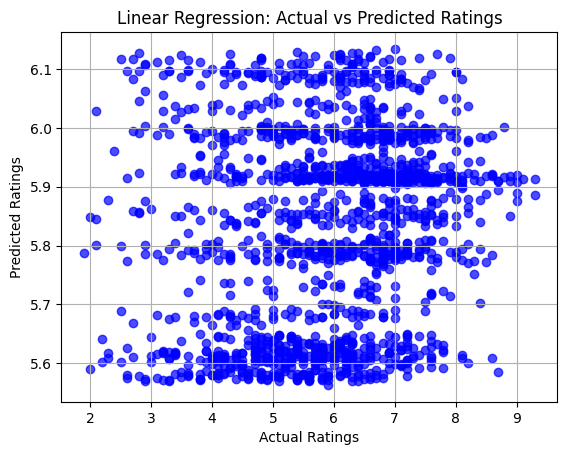

In [12]:
plt.scatter(y_test, lr_preds, alpha=0.7, color='blue')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Linear Regression: Actual vs Predicted Ratings")
plt.grid(True)
plt.show()


In [13]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [14]:
rf_preds = rf_model.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, rf_preds))
print("Random Forest MSE:", mean_squared_error(y_test, rf_preds))


Random Forest R2 Score: -0.003123724117676252
Random Forest MSE: 1.864952597156622


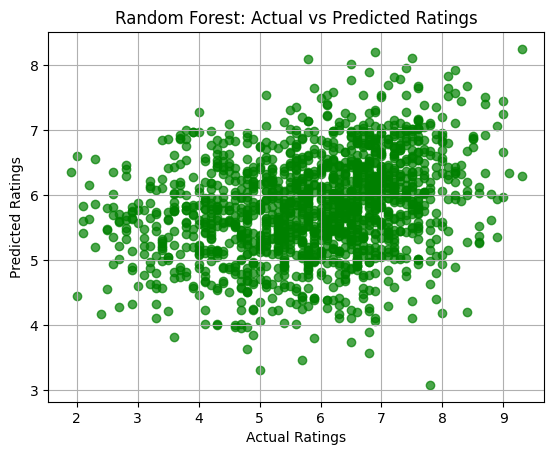

In [15]:
plt.scatter(y_test, rf_preds, alpha=0.7, color='green')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Random Forest: Actual vs Predicted Ratings")
plt.grid(True)
plt.show()
